# TunerFish Exploratory Data Analysis

In this notebook we ran some exploratory processing of the FMA dataset.

Note: The FMA <a href="https://nbviewer.jupyter.org/github/mdeff/fma/blob/outputs/usage.ipynb">documentation</a>, <a href="https://github.com/mdeff/fma">example source code</a>, and <a href="https://arxiv.org/pdf/1612.01840.pdf">whitepaper</a> are referenced heavily for many of the tasks performed here.

In [78]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import sklearn as skl
import utils  # a custom utility from the FMA authors themselves
from tf_utils import load_metadata
from collections import Counter


plt.rcParams['figure.figsize'] = (17, 5)

We can begin by loading some data into memory and examining the dimensions of our data. 

TODO: As of 4/25, `tracks.csv` is not loading properly.

In [2]:
# Load metadata and features
tracks = load_metadata('../data/fma_metadata/tracks.csv')  # going to have to figure out why this isn't working
genres = utils.load('../data/fma_metadata/genres.csv')
features = utils.load('../data/fma_metadata/features.csv')
echonest = utils.load('../data/fma_metadata/echonest.csv')

print("Tracks shape: {}, Genres shape : {}, Features shape: {}, EchoNest shape: {}".format(tracks.shape, genres.shape, features.shape, echonest.shape))

E:\Bill\Documents\classes\current\datasci\final\eda\tf_utils.py:40: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


Tracks shape: (106574, 52), Genres shape : (163, 4), Features shape: (106574, 518), EchoNest shape: (13129, 249)


In [10]:
tracks[('track')].head()
print(tracks.columns.values)

[('album', 'comments') ('album', 'date_created')
 ('album', 'date_released') ('album', 'engineer') ('album', 'favorites')
 ('album', 'id') ('album', 'information') ('album', 'listens')
 ('album', 'producer') ('album', 'tags') ('album', 'title')
 ('album', 'tracks') ('album', 'type') ('artist', 'active_year_begin')
 ('artist', 'active_year_end') ('artist', 'associated_labels')
 ('artist', 'bio') ('artist', 'comments') ('artist', 'date_created')
 ('artist', 'favorites') ('artist', 'id') ('artist', 'latitude')
 ('artist', 'location') ('artist', 'longitude') ('artist', 'members')
 ('artist', 'name') ('artist', 'related_projects') ('artist', 'tags')
 ('artist', 'website') ('artist', 'wikipedia_page') ('set', 'split')
 ('set', 'subset') ('track', 'bit_rate') ('track', 'comments')
 ('track', 'composer') ('track', 'date_created')
 ('track', 'date_recorded') ('track', 'duration') ('track', 'favorites')
 ('track', 'genre_top') ('track', 'genres') ('track', 'genres_all')
 ('track', 'information')

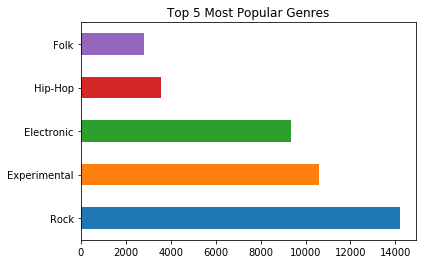

In [28]:
# tracks[('track', 'genre_top')].value_counts(sort=True).plot.barh();
genre_top_barh = pd.value_counts(tracks[('track', 'genre_top')], sort=True) \
        .nlargest(5).plot.barh(title="Top 5 Most Popular Genres");

In [77]:
untitled_keywords = ["Unknown", "Untitled", "untitled", "unknown", "Title Unknown"]
for i in range(100):  # arbitrarily large
    untitled_keywords.append("Untitled {}".format(i))

title_counter = Counter(list(tracks[('track', 'title')].values))
untitled_count = 0
for u in untitled_keywords:
    if title_counter[u]:
        print("Number of tracks with title {}: {}".format(u, title_counter[u]))
    untitled_count += title_counter[u]
print("{} untitled songs total".format(untitled_count))

Number of tracks with title Unknown: 9
Number of tracks with title Untitled: 298
Number of tracks with title untitled: 30
Number of tracks with title Title Unknown: 29
Number of tracks with title Untitled 1: 24
Number of tracks with title Untitled 2: 25
Number of tracks with title Untitled 3: 14
Number of tracks with title Untitled 4: 10
Number of tracks with title Untitled 5: 6
Number of tracks with title Untitled 6: 3
Number of tracks with title Untitled 7: 2
Number of tracks with title Untitled 8: 2
Number of tracks with title Untitled 9: 2
Number of tracks with title Untitled 10: 2
Number of tracks with title Untitled 11: 1
Number of tracks with title Untitled 14: 1
Number of tracks with title Untitled 18: 1
Number of tracks with title Untitled 24: 1
460 untitled songs total


In [ ]:
ts = pd.Series()

In [4]:
genres.head()

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


In [5]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                               ...      tonnetz  \
statistics                                            ...          std   
number            07        08        09        10    ...           04   
track_id                                              ...                
2           1.481593  2.691455  0.866868  1.341231    ...     0.054125   
3           1.366848  1.054094  0.108103  0.619185    ...     0.063831   
5          -0.923192 -0.927232  0.666617  1.038546    ...     0.040730   
10          1.770694  1.604566  0.521217  1.982386    ...     0.074358   
20         -0.289294 -0.816410  0.043851 -0.804761    ...     0.095003   

feature                               zcr                                \
statistics                       kurtosis       max      mean    median   
number            05        06         01        01        01        01   
track_id                                                                  
2           0.012226  0.012111   5.758890  0.459473  0.085629  0.071289   
3           0.014212  0.017740   2.824694  0.466309  0.084578  0.063965   
5           0.012691  0.014759   6.808415  0.375000  0.053114  0.041504   
10          0.017952  0.013921  21.434212  0.452148  0.077515  0.071777   
20          0.022492  0.021355  16.669037  0.469727  0.047225  0.040039   

feature                                   
statistics       min      skew       std  
number            01        01        01  
track_id                                  
2           0.000000  2.089872  0.061448  
3           0.000000  1.716724  0.069330  
5           0.000000  2.193303  0.044861  
10          0.000000  3.542325  0.040800  
20          0.000977  3.189831  0.030993  

[5 rows x 518 columns]

In [6]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        \
                                           metadata                      
         speechiness    tempo   valence  album_date         album_name   
track_id                                                                 
2           0.159310  165.922  0.576661         NaN                NaN   
3           0.461818  126.957  0.269240         NaN                NaN   
5           0.124595  100.260  0.621661         NaN                NaN   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker   
134         0.525519  114.290  0.894072         NaN                NaN   

             ...                                                       \
             ...     temporal_features                                  
             ...                   214        215       216       217   
track_id     ...                                                        
2            ...             -1.992303   6.805694  0.233070  0.192880   
3            ...             -1.582331   8.889308  0.258464  0.220905   
5            ...             -2.288358  11.527109  0.256821  0.237820   
10           ...             -3.662988  21.508228  0.283352  0.267070   
134          ...             -1.452696   2.356398  0.234686  0.199550   

                                                                        
                                                                        
               218      219       220       221        222         223  
track_id                                                                
2         0.027455  0.06408   3.67696   3.61288  13.316690  262.929749  
3         0.081368  0.06413   6.08277   6.01864  16.673548  325.581085  
5         0.060122  0.06014   5.92649   5.86635  16.013849  356.755737  
10        0.125704  0.08082   8.41401   8.33319  21.317064  483.403809  
134       0.149332  0.06440  11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

Let's examine some features of the echonest data.

In [7]:
def print_avg(label, column):
    print("Average {}: {:2f}".format(label, np.mean(column)))

for col in echonest.columns.values[:8]:
    print_avg(col[-1], echonest[col])

Average acousticness: 0.524688
Average danceability: 0.487290
Average energy: 0.537516
Average instrumentalness: 0.640536
Average liveness: 0.187804
Average speechiness: 0.099174
Average tempo: 123.080061
Average valence: 0.439761


Sadly, from the cell below, there doesn't seem to be much correlation between the echonest audio features. The most correlated pair of features, 'acousticness' and 'energy', have only a 0.47 correlation.

In [8]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

en_audio_feats = echonest[('echonest', 'audio_features')]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(en_audio_feats))

Top Absolute Correlations
acousticness      energy         0.477273
danceability      valence        0.428515
energy            tempo          0.227324
                  valence        0.219384
instrumentalness  speechiness    0.216689
dtype: float64
